### Explorando Datos Finanzas
Se obtuvo datos de ejemplo del DatawareHouse de Adventure Works 
<a href="https://github.com/microsoft/sql-server-samples/tree/master/samples/databases/adventure-works/data-warehouse-install-script">Datos de Origen</a>

In [2]:
# Importacion de Librerias
import pandas as pd   

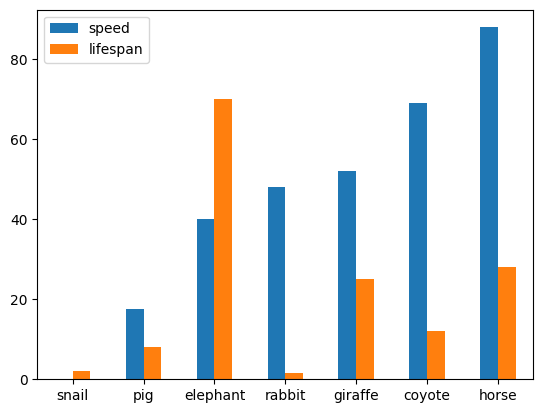

In [3]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0)

Obtener todos los datos de la consulta en un dataframe 

In [4]:
import sqlalchemy
import pyodbc
cnxn = pyodbc.connect(r'Driver=SQL Server;Server=.\SQL22;Database=AdventureWorksDW;Trusted_Connection=yes;')
query = "SELECT * FROM vFactFinance"
df = pd.read_sql(query, cnxn)
df

,FinanceKey,Fecha,Organizacion,Gerencia,Escenario,Descripcion Cuenta,Monto,TotalYTD
0,26702,2012-12-28,Australia,Corporate,Actual,Salaries,19305.12,1392505.88
1,26703,2012-12-28,Australia,Corporate,Actual,Payroll Taxes,1783.74,1392505.88
2,26704,2012-12-28,Australia,Corporate,Actual,Employee Benefits,1188.99,1392505.88
3,26705,2012-12-28,Australia,Corporate,Actual,Travel Transportation,190.73,1392505.88
4,26706,2012-12-28,Australia,Corporate,Actual,Travel Lodging,173.18,1392505.88
...,...,...,...,...,...,...,...,...
39404,37663,2013-10-29,Southwest Division,Sales and Marketing,Actual,Other Retirement Benefits,65721.00,81634238.80
39405,37664,2013-10-29,Southwest Division,Sales and Marketing,Actual,Other Long Term Liabilities,36027.00,81634238.80
39406,37665,2013-10-29,Southwest Division,Sales and Marketing,Actual,Additional Paid In Capital,-464904.00,81634238.80
39407,37666,2013-10-29,Southwest Division,Sales and Marketing,Actual,Current Retained Earnings,2371138.00,81634238.80


Para filtrar una dataframe se debe asignar un índice y luego ordenarlo. \
Puede ordernar por una o más columnas. \
en este caso lo haremos por fecha

In [5]:
# Set date as the index and sort the index
ViewFinance = df.set_index("Fecha").sort_index()
ViewFinance

,FinanceKey,Organizacion,Gerencia,Escenario,Descripcion Cuenta,Monto,TotalYTD
Fecha,,,,,,,
2010-12-29,471,Southeast Division,Corporate,Actual,Salaries,20800.0,3.014131e+06
2010-12-29,231,Northwest Division,Corporate,Actual,Interest Expense,270.0,1.733393e+06
2010-12-29,232,Northwest Division,Corporate,Actual,Gain/Loss on Sales of Asset,-216.0,1.733393e+06
2010-12-29,233,Northwest Division,Corporate,Actual,Other Income,360.0,1.733393e+06
2010-12-29,234,Northwest Division,Corporate,Actual,Taxes,96.0,1.733393e+06
...,...,...,...,...,...,...,...
2013-12-28,39396,France,Sales and Marketing,Actual,Additional Paid In Capital,-475000.0,4.361114e+07
2013-12-28,39395,France,Sales and Marketing,Actual,Partner Capital,475000.0,4.361114e+07
2013-12-28,39379,Northeast Division,Sales and Marketing,Actual,Curr Xchg Gain/(Loss),12555.0,4.339472e+07


In [8]:
# Use Boolean conditions to subset temperatures for rows in 2011 and 2012
filtroBooleano = ViewFinance[(ViewFinance.index >= "2011-01-01") & (ViewFinance.index <= "2012-12-31")]
print(filtroBooleano)

            FinanceKey        Organizacion              Gerencia Escenario  \
Fecha                                                                        
2011-01-29        1718  Southeast Division  Inventory Management    Actual   
2011-01-29        1719  Southeast Division  Inventory Management    Actual   
2011-01-29        1720  Southeast Division  Inventory Management    Budget   
2011-01-29        1726  Southeast Division  Inventory Management    Actual   
2011-01-29        1722  Southeast Division  Inventory Management    Actual   
...                ...                 ...                   ...       ...   
2012-12-28       26299   Canadian Division             Corporate    Actual   
2012-12-28       26297   Canadian Division             Corporate    Actual   
2012-12-28       26296   Canadian Division             Corporate    Actual   
2012-12-28       26298   Canadian Division             Corporate    Actual   
2012-12-28       26309   Canadian Division             Corporate

In [14]:
# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
ViewFinance.loc["2010":"2011"]

,FinanceKey,Organizacion,Gerencia,Escenario,Descripcion Cuenta,Monto,TotalYTD
Fecha,,,,,,,
2010-12-29,471,Southeast Division,Corporate,Actual,Salaries,20800.0,3014131.0
2010-12-29,231,Northwest Division,Corporate,Actual,Interest Expense,270.0,1733393.0
2010-12-29,232,Northwest Division,Corporate,Actual,Gain/Loss on Sales of Asset,-216.0,1733393.0
2010-12-29,233,Northwest Division,Corporate,Actual,Other Income,360.0,1733393.0
2010-12-29,234,Northwest Division,Corporate,Actual,Taxes,96.0,1733393.0
...,...,...,...,...,...,...,...
2010-12-29,726,Southeast Division,Research and Development,Budget,Travel Transportation,280.0,3014131.0
2010-12-29,731,Southeast Division,Research and Development,Budget,Entertainment,100.0,3014131.0
2010-12-29,732,Southeast Division,Research and Development,Actual,Entertainment,109.0,3014131.0


In [13]:
# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
ViewFinance.loc["2010-08":"2011-02"]

,FinanceKey,Organizacion,Gerencia,Escenario,Descripcion Cuenta,Monto,TotalYTD
Fecha,,,,,,,
2010-12-29,471,Southeast Division,Corporate,Actual,Salaries,20800.0,3014131.0
2010-12-29,231,Northwest Division,Corporate,Actual,Interest Expense,270.0,1733393.0
2010-12-29,232,Northwest Division,Corporate,Actual,Gain/Loss on Sales of Asset,-216.0,1733393.0
2010-12-29,233,Northwest Division,Corporate,Actual,Other Income,360.0,1733393.0
2010-12-29,234,Northwest Division,Corporate,Actual,Taxes,96.0,1733393.0
...,...,...,...,...,...,...,...
2011-01-29,1512,Central Division,Research and Development,Actual,Salaries,24960.0,45526483.4
2011-01-29,1511,Central Division,Research and Development,Budget,Variances,12900.0,45526483.4
2011-01-29,1510,Central Division,Research and Development,Actual,Variances,8048.0,45526483.4
